# Normal Distribution

The normal distribution is defined by the following probability density function, where $\mu$ is the population mean and $\sigma^2$ is the variance.

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}$$
   
If a random variable X follows the normal distribution, then we write:

$$X \sim  N (\mu,\sigma^2)$$

In particular, the normal distribution with $\mu = 0$ and $\sigma = 1$ is called the `standard normal distribution`, and is denoted as `N(0,1`). It can be graphed as follows.

The normal distribution is important because of the **Central Limit Theorem**, which states that the population of all possible samples of size $n$ from a population with mean μ and variance $\sigma^2$ approaches a normal distribution with mean $\mu$ and $\frac{\sigma^2}{n}$ when $n$ approaches infinity.

Read and understand more about **Central Limit Theorem (CLT)** [here](https://statisticsbyjim.com/basics/central-limit-theorem/)

In [2]:
import math
import numpy as np
from scipy.stats import norm

## Question 1

Suppose widgit weights produced at MS Widgit Works have weights that are normally distributed with mean 17.46 grams and variance 375.67 grams. What is the probability that a randomly chosen widgit weighs more than 19 grams?

In [6]:
mean = 17.46
variance = 375.67
std = math.sqrt(variance)
print(std)

ans = (norm.sf(19,17.46,19.38))
ans

19.382208336513155


0.4683320352468797

## Question 2

Suppose IQ scores are normally distributed with mean 100 and standard deviation 15. What is the 95th percentile of the distribution of IQ scores?

In [17]:
norm.ppf(0.95,100,15)

124.67280440427209

In [3]:
(100 + np.array([+1,-1]) * norm.ppf(0.975)*(15)/np.sqrt(45))

array([104.3826127,  95.6173873])

## Question 3

Suppose wages are normally distributed with a mean of 1900 and a standard deviation of 150. 

1. What percentage of people have wages less than 1800?
2. What percentage of people have wages greater than 2100?
3. What percentage of people have wages between 1800 and 2100?
4. What wages separate the top 10% from the others?
5. What wages separate the lower 25% from the others? 

In [13]:
#1
a = (norm.cdf(1800,1900,150))
a = a*100
print ('Q1:',("{:.2f}".format(a)),'%')

#2
b = (norm.sf(2100,1900,150))
b = b*100
print ('Q2:',("{:.2f}".format(b)),'%')

#3
c = ((norm.cdf(2100,1900,150)) - (norm.cdf(1800,1900,150)))
c = c*100
print ('Q3:',("{:.2f}".format(c)),'%')

#4
# (top 10% = 90%+)
d = (norm.ppf(0.9,1900,150))
print ('Q4: RM',("{:.2f}".format(d)))

#5
# (lower 25%)
e = (norm.ppf(0.25,1900,150))
print ('Q5: RM',("{:.2f}".format(e)))

Q1: 25.25 %
Q2: 9.12 %
Q3: 65.63 %
Q4: RM 2092.23
Q5: RM 1798.83


## Question 4

Based on the Ages of Death during the Spanish Flu, 1918.

Demonstration of the central limit theorem, using the distribution of sample mean age at death in samples from a highly non-normal distribution: the frequency distribution of age at death in Switzerland in 1918 during the Spanish flu epidemic.

In [3]:
## Question 3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path="http://whitlockschluter.zoology.ubc.ca/wp-content/data/chapter10/chap10e6AgesAtDeathSpanishFlu1918.csv"
flu = pd.read_csv(path)
flu.head()

,age
0,0
1,0
2,0
3,0
4,0


Histogram showing the frequency distribution of ages at death in Switzerland in 1918 during the Spanish flu epidemic.

(array([11446.,  6803., 11861.,  8359.,  7377.,  9648., 12524.,  6467.,
          549.]),
 array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
         44.44444444,  55.55555556,  66.66666667,  77.77777778,
         88.88888889, 100.        ]),
 <BarContainer object of 9 artists>)

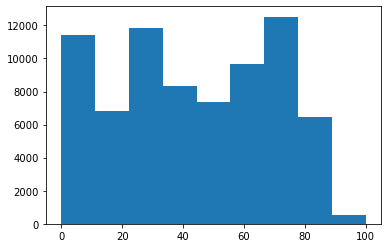

In [7]:
plt.hist(flu['age'], bins=9)

Histogram with better binning (0,102,2) and axis labels

Text(0, 0.5, 'Frequency')

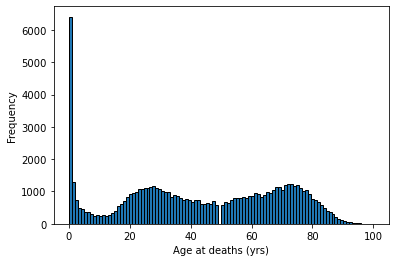

In [4]:
plt.hist(flu['age'],bins=102, ec = 'black')
plt.xlabel('Age at deaths (yrs)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

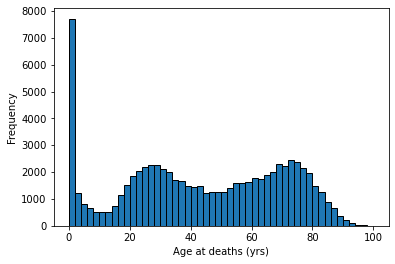

In [42]:
plt.hist(flu['age'],bins=50, ec = 'black')
plt.xlabel('Age at deaths (yrs)')
plt.ylabel('Frequency')

Demonstrate the **central limit theorem**. Treat the age at death measurements from Switzerland in 1918 as the population. Take a large number of random samples, each of size $n$, from the population of age at death measurements and plot the sample means.

Note: your results won’t be the identical to the one shown below, because 10,000 random samples is not large enough for extreme accuracy. Change the $n$ below to another number and rerun to see the effects of sample size on the shape of the distribution of sample means.

Write a loop to sample 10000 times from 'Age'. Each time, collect 4 samples. Store the average age in a new variable, `age1`. Plot the histogram for `age1`.

In [6]:
import random

random.seed(1234)
age1 = []

for x in range(10000):
    sampled_list = flu.sample(n=4)
    age1.append(sampled_list['age'].mean())

Text(0, 0.5, 'Frequency')

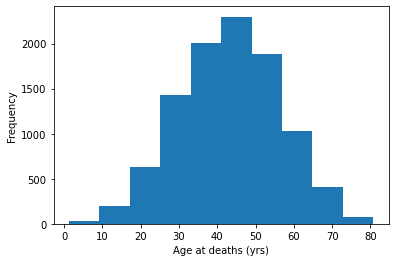

In [9]:
plt.hist(age1,bins=10)
plt.xlabel('Age at deaths (yrs)')
plt.ylabel('Frequency')

Histogram of the sample means with more options

Text(0, 0.5, 'Frequency')

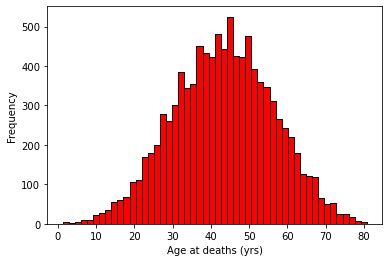

In [10]:
plt.hist(age1,bins=50, ec = 'black', color = 'r')
plt.xlabel('Age at deaths (yrs)')
plt.ylabel('Frequency')